# Protocolo de Teleportación
    Circuitos Cuánticos
    Angel Alvarez. 16-10031
    Junio, 2020

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram as plth,  plot_bloch_multivector as pltbm
from qiskit.quantum_info import Statevector as st
from numpy import pi

Creación de los registros del circuito.

In [2]:
# Registros del circuito
qr = QuantumRegister(3, name ='q')
cr = ClassicalRegister(1, name='c')

Primero convertimos a q_1 y q_2 en un par entrelazado, específicamente en el estado de Bell Phi+. Un qubit del par le es entregado a Alice y otro a Bob
Luego se realiza la codificación de Alice entre el qubit que desea enviar y su qubit del par entrelazado.
Finalmente, Bob realiza la decodificación sobre su qubit del par entrelazado y los qubits de Alice.

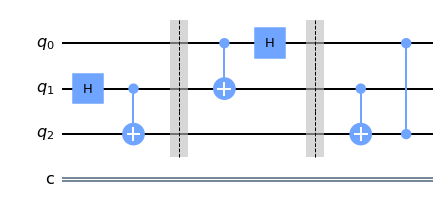

In [3]:
# Ensamblado del cirucito
circuit = QuantumCircuit(qr, cr)

# Construcción del par entrelazado
circuit.h(1)
circuit.cx(1,2)
circuit.barrier()

# Codicifación de Alice
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()

# Decodificación de Bob
circuit.cx(1,2)
circuit.cz(0,2)

circuit.draw(output='mpl')

Veamos el vector de estado resultante, este siempre debe coincidir al vector de estado inicial de q_0.

C:\Users\angel\anaconda3\envs\MyEnv\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


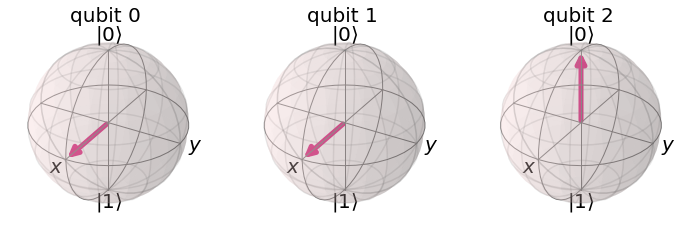

In [4]:
# Vector de estado

sim = Aer.get_backend('statevector_simulator')
qobj = assemble(circuit)
out_vector = sim.run(qobj).result().get_statevector()
pltbm(out_vector)

Ahora, realicemos la medida sobre el estado de Bob para ver si coincide con el qubit que queria mandar Alice. En nuetro caso, el qubit 0.

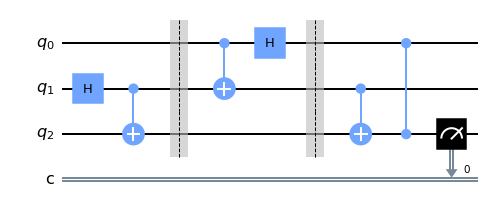

In [5]:
# Medida 

circuit.measure(2,0)
circuit

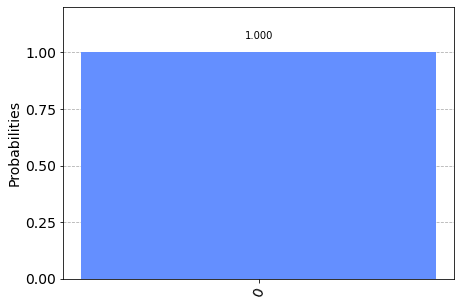

In [6]:
sim = Aer.get_backend('qasm_simulator')
results = execute(circuit, backend = sim, shots = 8192).result()
counts = results.get_counts()
plth(counts)

Como podemos ver, el estado de Bob es el 100% de las veces el estado q_0 original de Alice.